In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("C:\\Users\\user\\Desktop\\datas\\ad.data", header=None)
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [2]:
df.describe

<bound method NDFrame.describe of       0     1       2    3     4     5     6     7     8     9     ...  1549  \
0      125   125     1.0    1     0     0     0     0     0     0  ...     0   
1       57   468  8.2105    1     0     0     0     0     0     0  ...     0   
2       33   230  6.9696    1     0     0     0     0     0     0  ...     0   
3       60   468     7.8    1     0     0     0     0     0     0  ...     0   
4       60   468     7.8    1     0     0     0     0     0     0  ...     0   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   
3274   170    94  0.5529    0     0     0     0     0     0     0  ...     0   
3275   101   140  1.3861    1     0     0     0     0     0     0  ...     0   
3276    23   120  5.2173    1     0     0     0     0     0     0  ...     0   
3277     ?     ?       ?    1     0     0     0     0     0     0  ...     0   
3278    40    40     1.0    1     0     0     0     0     0     0  ...     0   

     

In [3]:
df.describe()

,4,5,6,7,8,9,10,11,12,13,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3278,40,40,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [6]:
df.values

array([[' 125', ' 125', '   1.0', ..., 0, 0, 'ad.'],
       ['  57', ' 468', '8.2105', ..., 0, 0, 'ad.'],
       ['  33', ' 230', '6.9696', ..., 0, 0, 'ad.'],
       ...,
       ['  23', ' 120', '5.2173', ..., 0, 0, 'nonad.'],
       ['   ?', '   ?', '     ?', ..., 0, 0, 'nonad.'],
       ['  40', '  40', '   1.0', ..., 0, 0, 'nonad.']], dtype=object)

In [7]:
print(df.columns)
print(df.columns.values)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558],
           dtype='int64', length=1559)
[   0    1    2 ... 1556 1557 1558]


In [8]:
explanatory_variable_columns=set(df.columns.values)
print(explanatory_variable_columns)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [9]:
respomse_variable_columns=df[len(df.columns.values)-1]
print(respomse_variable_columns)

0          ad.
1          ad.
2          ad.
3          ad.
4          ad.
         ...  
3274    nonad.
3275    nonad.
3276    nonad.
3277    nonad.
3278    nonad.
Name: 1558, Length: 3279, dtype: object


In [10]:
explanatory_variable_columns.remove(len(df.columns.values)-1)
print(explanatory_variable_columns)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Take respomse_variable_columns as y

In [11]:
y=[1 if e=='ad.' else 0 for e in respomse_variable_columns]
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

 Take explanatory_variable_columns as X

In [12]:
X=df[list(explanatory_variable_columns)]
print(X)

      0     1       2    3     4     5     6     7     8     9     ...  1548  \
0      125   125     1.0    1     0     0     0     0     0     0  ...     0   
1       57   468  8.2105    1     0     0     0     0     0     0  ...     0   
2       33   230  6.9696    1     0     0     0     0     0     0  ...     0   
3       60   468     7.8    1     0     0     0     0     0     0  ...     0   
4       60   468     7.8    1     0     0     0     0     0     0  ...     0   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   
3274   170    94  0.5529    0     0     0     0     0     0     0  ...     0   
3275   101   140  1.3861    1     0     0     0     0     0     0  ...     0   
3276    23   120  5.2173    1     0     0     0     0     0     0  ...     0   
3277     ?     ?       ?    1     0     0     0     0     0     0  ...     0   
3278    40    40     1.0    1     0     0     0     0     0     0  ...     0   

      1549  1550  1551  1552  1553  155

 Replace ? from X

In [13]:
X.replace(to_replace=' *\?', value=-1,regex=True,inplace=True)
print(X)

      0     1       2    3     4     5     6     7     8     9     ...  1548  \
0      125   125     1.0    1     0     0     0     0     0     0  ...     0   
1       57   468  8.2105    1     0     0     0     0     0     0  ...     0   
2       33   230  6.9696    1     0     0     0     0     0     0  ...     0   
3       60   468     7.8    1     0     0     0     0     0     0  ...     0   
4       60   468     7.8    1     0     0     0     0     0     0  ...     0   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   
3274   170    94  0.5529    0     0     0     0     0     0     0  ...     0   
3275   101   140  1.3861    1     0     0     0     0     0     0  ...     0   
3276    23   120  5.2173    1     0     0     0     0     0     0  ...     0   
3277    -1    -1      -1    1     0     0     0     0     0     0  ...     0   
3278    40    40     1.0    1     0     0     0     0     0     0  ...     0   

      1549  1550  1551  1552  1553  155

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
y=pd.DataFrame(y)

In [15]:
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
3274,0
3275,0
3276,0
3277,0


In [16]:
labels=y[0].unique()
count=y[0].value_counts()

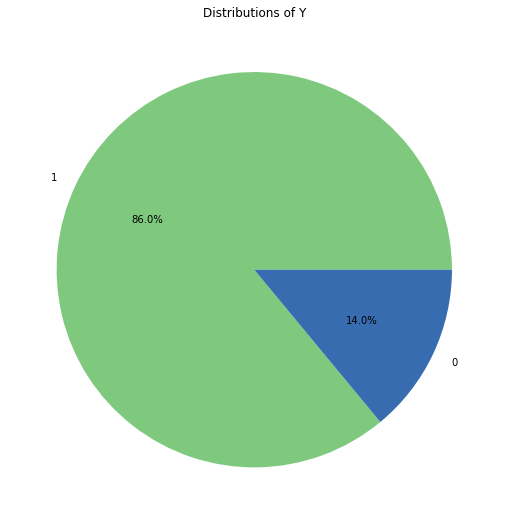

In [17]:
plt.figure(figsize=(20,20))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of Y')
pie=plt.pie(count,labels=labels,autopct='%1.1f%%',colors=colors)

By using Decision Tree

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.5)
pipeline=Pipeline([('clf',DecisionTreeClassifier(criterion='entropy'))])
parameters={
    'clf__max_depth':(150,155,160),
    'clf__min_samples_leaf':(1,2,3)
}

grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,
                         verbose=1,scoring='f1')
grid_search.fit(X_train,Y_train)
print('best score : %0.3f'% grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.3s finished


best score : 0.855


 Find best parameters

In [19]:
print('Best parameters set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted (parameters.keys()):
    print('\t%s : %r'%(param_name,best_parameters[param_name]))


Best parameters set:
	clf__max_depth : 150
	clf__min_samples_leaf : 2


In [20]:
print('Accuracy of Training data by using Decision Tree: {:.2f}'.format(grid_search.score(X_train,Y_train)))

Accuracy of Training data by using Decision Tree: 0.95


In [21]:
print('Accuracy of Testing Data by using Decision Tree: {:.2f}'.format(grid_search.score(X_test,Y_test)))

Accuracy of Testing Data by using Decision Tree: 0.88


In [22]:
predictions=grid_search.predict(X_test)

In [23]:
print("predicted values: ",predictions)

predicted values:  [1 0 0 ... 0 0 0]


In [24]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1407
           1       0.92      0.84      0.88       233

    accuracy                           0.97      1640
   macro avg       0.94      0.91      0.93      1640
weighted avg       0.97      0.97      0.97      1640



By using Random Forest Classification

In [25]:
random_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
random_classifier.fit(X_train,Y_train)

<ipython-input-25-f0ec0fd32529>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_classifier.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [26]:
random_prediction=random_classifier.predict(X_test)

In [27]:
print("predicted values by using Random Forest Classification",random_prediction)

predicted values by using Random Forest Classification [1 0 0 ... 0 0 0]


In [28]:
print('Accuracy of Training data by using Random Forest Classifier: {:.2f}'.format(random_classifier.score(X_train,Y_train)))

Accuracy of Training data by using Random Forest Classifier: 1.00


In [29]:
print('Accuracy of testing data by using Random Forest Classifier: {:.2f}'.format(random_classifier.score(X_test,Y_test)))

Accuracy of testing data by using Random Forest Classifier: 0.98


In [30]:
print(classification_report(Y_test,random_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1407
           1       0.97      0.85      0.91       233

    accuracy                           0.98      1640
   macro avg       0.97      0.92      0.95      1640
weighted avg       0.98      0.98      0.97      1640



Created a Data Frame which include all predicted values of Decision Tree Classification model,mRandom Forest Classification model and compare these predicted values with true value(Ytest)

In [31]:
predictions=pd.DataFrame(predictions)

In [37]:
random_prediction=pd.DataFrame(random_prediction)
random_prediction

,0
0,1
1,0
2,0
3,0
4,1
...,...
1635,0
1636,0
1637,0
1638,0


In [39]:
random_prediction.columns=['predicted values by using Random Forest Classifier']
random_prediction

,predicted values by using Random Forest Classifier
0,1
1,0
2,0
3,0
4,1
...,...
1635,0
1636,0
1637,0
1638,0


In [33]:
predictions.columns=['predicted values by using Decision Tree Classifier']
predictions

,predicted values by using Decision Tree Classifier
0,1
1,0
2,0
3,0
4,1
...,...
1635,0
1636,0
1637,0
1638,0


In [43]:
Y_test=pd.DataFrame(Y_test)
Y_test

,0
361,1
2361,0
1446,0
1634,0
249,1
...,...
1922,0
1624,0
2438,0
1161,0


In [45]:
Y_test.columns=['Y_true']
Y_test

,Y_true
361,1
2361,0
1446,0
1634,0
249,1
...,...
1922,0
1624,0
2438,0
1161,0


In [46]:
Model_Datas=[Y_test,random_prediction,predictions]
Predicted_data=pd.concat(Model_Datas,axis=1,join='inner')

In [47]:
Predicted_data

,Y_true,predicted values by using Random Forest Classifier,predicted values by using Decision Tree Classifier
361,1,0,0
1446,0,0,0
1634,0,1,1
249,1,0,0
511,0,0,0
...,...,...,...
1489,0,0,0
434,1,0,0
1624,0,0,0
1161,0,0,0


In [48]:
Predicted_data.tail()

,Y_true,predicted values by using Random Forest Classifier,predicted values by using Decision Tree Classifier
1489,0,0,0
434,1,0,0
1624,0,0,0
1161,0,0,0
1078,0,0,0


In [49]:
Predicted_data[0:60]

,Y_true,predicted values by using Random Forest Classifier,predicted values by using Decision Tree Classifier
361,1,0,0
1446,0,0,0
1634,0,1,1
249,1,0,0
511,0,0,0
762,0,0,0
725,0,0,0
16,1,0,0
1197,0,0,0
344,1,0,0


In [56]:
Predicted_data[60:120]

,Y_true,predicted values by using Random Forest Classifier,predicted values by using Decision Tree Classifier
65,1,1,1
329,1,0,0
740,0,0,0
66,1,1,1
69,1,0,0
414,1,0,0
1256,0,1,1
661,0,0,0
1147,0,0,0
27,1,0,0


In [50]:
print(Predicted_data.values)

[[1 0 0]
 [0 0 0]
 [0 1 1]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [52]:
labels=Predicted_data['Y_true'].unique()
count=Predicted_data['Y_true'].value_counts()


labels_random=Predicted_data['predicted values by using Random Forest Classifier'].unique()
count_random=Predicted_data['predicted values by using Random Forest Classifier'].value_counts()



labels_Decision_Tree=Predicted_data['predicted values by using Decision Tree Classifier'].unique()
count_Decision_Tree=Predicted_data['predicted values by using Decision Tree Classifier'].value_counts()

Accuracy of testing data by using Random Forest Classifier: 0.98
Accuracy of Testing Data by using Decision Tree: 0.88


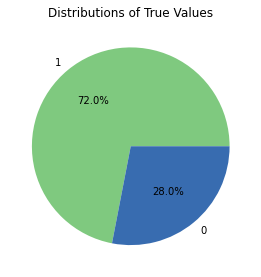

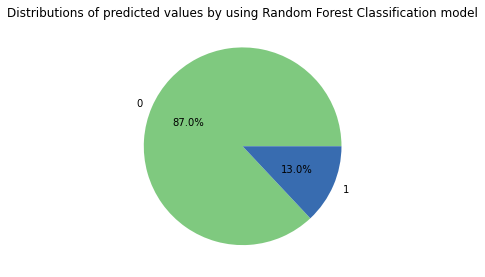

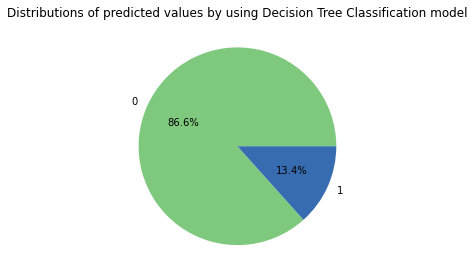

In [53]:
plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of True Values')
pie=plt.pie(count,labels=labels,autopct='%1.1f%%',colors=colors)



plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Random Forest Classification model')
pie=plt.pie(count_random,labels=labels_random,autopct='%1.1f%%',colors=colors)
print('Accuracy of testing data by using Random Forest Classifier: {:.2f}'.format(random_classifier.score(X_test,Y_test)))



plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Decision Tree Classification model')
pie=plt.pie(count_Decision_Tree,labels=labels_Decision_Tree,autopct='%1.1f%%',colors=colors)
print('Accuracy of Testing Data by using Decision Tree: {:.2f}'.format(grid_search.score(X_test,Y_test)))

In [54]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1407
           1       0.92      0.84      0.88       233

    accuracy                           0.97      1640
   macro avg       0.94      0.91      0.93      1640
weighted avg       0.97      0.97      0.97      1640



In [55]:
print(classification_report(Y_test,random_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1407
           1       0.97      0.85      0.91       233

    accuracy                           0.98      1640
   macro avg       0.97      0.92      0.95      1640
weighted avg       0.98      0.98      0.97      1640



The perfect model is Random Forest Classification model. Because the accuracy of this model is very high when compared to Decision Tree model

The accuracy of Random Forest classification model is 0.98

Here 233 are Advertisment and 1407 are Article content.